In [1]:
import talib
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [2]:
stock_data= pd.read_csv('EUR_STOCK_DATA.csv')
stock_data                        

,Gmt time,Volume,Open,High,Low,Close
0,12.12.2012 00:00:00.000,11011.3902,1.234920,1.235890,1.233830,1.235200
1,12.12.2012 04:00:00.000,13271.5599,1.235210,1.235510,1.233860,1.234340
2,12.12.2012 08:00:00.000,26716.2305,1.234350,1.236370,1.233305,1.234905
3,12.12.2012 12:00:00.000,28430.1602,1.234910,1.237285,1.234850,1.236810
4,12.12.2012 16:00:00.000,33124.1904,1.236800,1.238700,1.236285,1.238205
...,...,...,...,...,...,...
12885,11.12.2020 04:00:00.000,19540.2200,1.607955,1.608915,1.604095,1.605455
12886,11.12.2020 08:00:00.000,48969.4700,1.605465,1.611820,1.605225,1.609935
12887,11.12.2020 12:00:00.000,49848.5000,1.609930,1.611365,1.606575,1.606745
12888,11.12.2020 16:00:00.000,23094.5300,1.606720,1.609540,1.605880,1.607315


In [3]:
 #BETWEEN OPEN AND CLOSE
# If Datetime is in string only the 1st that is day was being comapred
stock_data['Gmt time']=pd.to_datetime(stock_data['Gmt time'])

def return_data_for_period():
  date1=input("Enter first Date for time period format D.M.Y :- ")
  date2=input("Enter Second Date for time period format D.M.Y :- ")
  date1=date1.split(".")
  date2=date2.split(".")
  date1=datetime.datetime(year=int(date1[2]),month=int(date1[1]),day=int(date1[0]))
  date2=datetime.datetime(year=int(date2[2]),month=int(date2[1]),day=int(date2[0]))
  date_filt1=stock_data[stock_data["Gmt time"]>date1]
  return date_filt1[date_filt1["Gmt time"]<date2]

Enter first Date for time period format D.M.Y :- 12.12.2012
Enter Second Date for time period format D.M.Y :- 11.12.2020


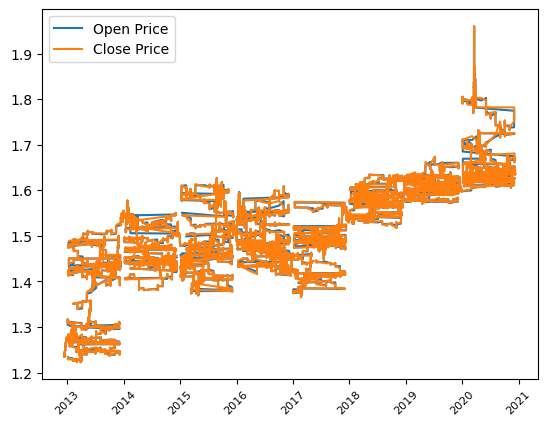

In [4]:
open_Close_filtered_Data=return_data_for_period()
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Open'],label="Open Price")
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Close'],label="Close Price")
plt.xticks(rotation=45,fontsize=8)
plt.legend()
plt.show()

Enter first Date for time period format D.M.Y :- 12.12.2012
Enter Second Date for time period format D.M.Y :- 11.12.2020


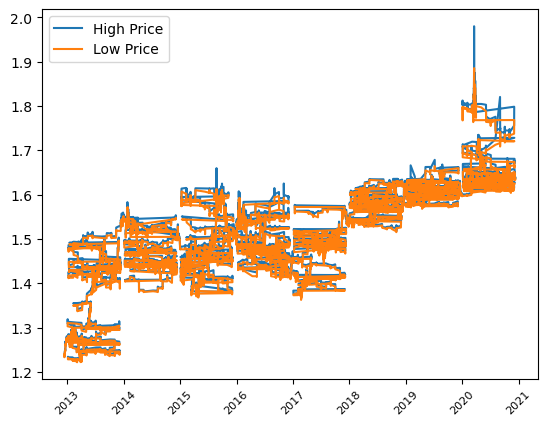

In [5]:
low_high_filtered_Data=return_data_for_period()
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['High'],label="High Price")
plt.plot(open_Close_filtered_Data['Gmt time'],open_Close_filtered_Data['Low'],label="Low Price")
plt.xticks(rotation=45,fontsize=8)
plt.legend()
plt.show()

In [ ]:
#Check which months over the year had highest Volume
# caluclate mean volume for each month each year
# 1 data frames that has 12 jan,feb,march,april,may,june,july..... and rows will be number of year

In [8]:
def find_data_for_all_months(column_to_mean):
  years=[]
  all_months_data=[]
  for index in range(9):
    years.append(2012+index)
  for k in range(1,13): # Number of months january is 1.................. 12 is december
    temp_monthly_data=[]
    for j in years:
      if k ==12:
        # date1 is year/01/12
        # date2 is year+1/01/01
        date1=datetime.datetime(year=j,month=k,day=1)
        date2=datetime.datetime(year=j+1,month=1,day=1)
      else:
        date1=datetime.datetime(year=j,month=k,day=1)
        date2=datetime.datetime(year=j,month=k+1,day=1)
      date_filt1=stock_data[stock_data["Gmt time"]>=date1]
      date_filter_2=date_filt1[date_filt1["Gmt time"]<date2]
      temp_monthly_data.append(date_filter_2[column_to_mean].mean())
    all_months_data.append(temp_monthly_data)
  return all_months_data

In [9]:
all_months_of_data=find_data_for_all_months("Close")
import numpy as np
data_of_months_as_a_array=np.array(all_months_of_data).T

In [10]:
months=["Jan","Feb","March","April","May","June","July","August","September","October","Nov","Dec"]
df_months=pd.DataFrame(data_of_months_as_a_array,columns=months)
df_months

,Jan,Feb,March,April,May,June,July,August,September,October,Nov,Dec
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.260667
1,1.306895,1.326251,1.288253,1.310941,1.346992,1.399938,1.405741,1.424611,1.413037,1.406557,1.423069,1.477877
2,1.516453,1.503636,1.498410,1.476764,1.470300,1.459650,1.453447,1.438407,1.451996,1.457385,1.455443,1.491154
3,1.444942,1.469696,1.429559,1.424009,1.436653,1.463560,1.490296,1.524419,1.543026,1.522163,1.484432,1.494214
4,1.531057,1.522531,1.487264,1.477037,1.526687,1.503745,1.473956,1.482791,1.483236,1.458749,1.457758,1.461720
5,1.440652,1.413132,1.425880,1.450520,1.492043,1.476504,1.469598,1.488445,1.484372,1.491372,1.529652,1.515086
6,1.550168,1.574893,1.589243,1.589392,1.566503,1.572172,1.578348,1.578388,1.600683,1.602263,1.570838,1.591427
7,1.595852,1.600312,1.600684,1.592690,1.613488,1.624696,1.606579,1.628455,1.616487,1.620309,1.616734,1.609527
8,1.635869,1.644154,1.752018,1.682134,1.662832,1.645513,1.640678,1.643998,1.641157,1.653526,1.631584,1.657920


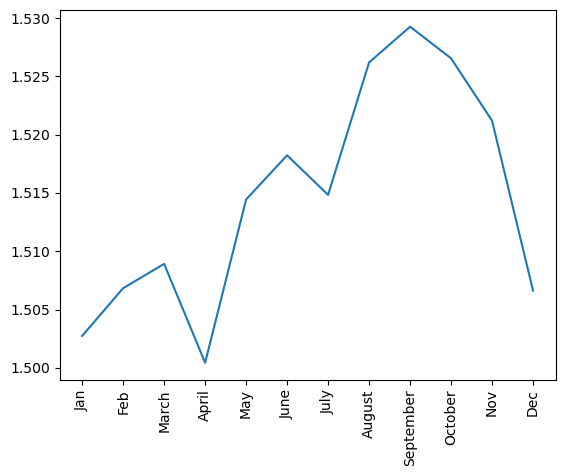

In [11]:
import matplotlib.pyplot as plt

plt.plot(df_months.mean())
plt.xticks(rotation=90)
plt.show()

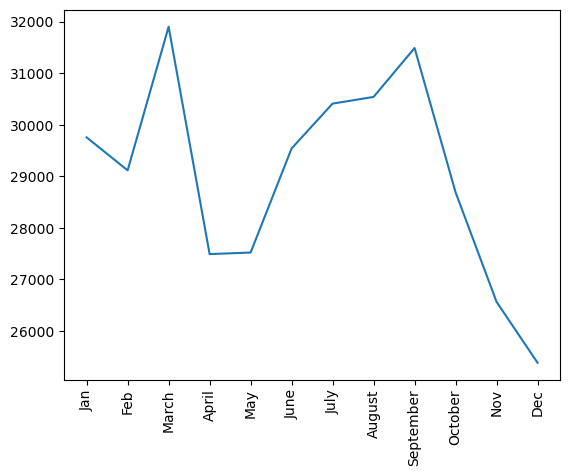

In [12]:
all_months_of_data=find_data_for_all_months("Volume")
import numpy as np
data_of_months_as_a_array=np.array(all_months_of_data).T
months=["Jan","Feb","March","April","May","June","July","August","September","October","Nov","Dec"]
df_months=pd.DataFrame(data_of_months_as_a_array,columns=months)
import matplotlib.pyplot as plt
plt.plot(df_months.mean())
plt.xticks(rotation=90)
plt.show()

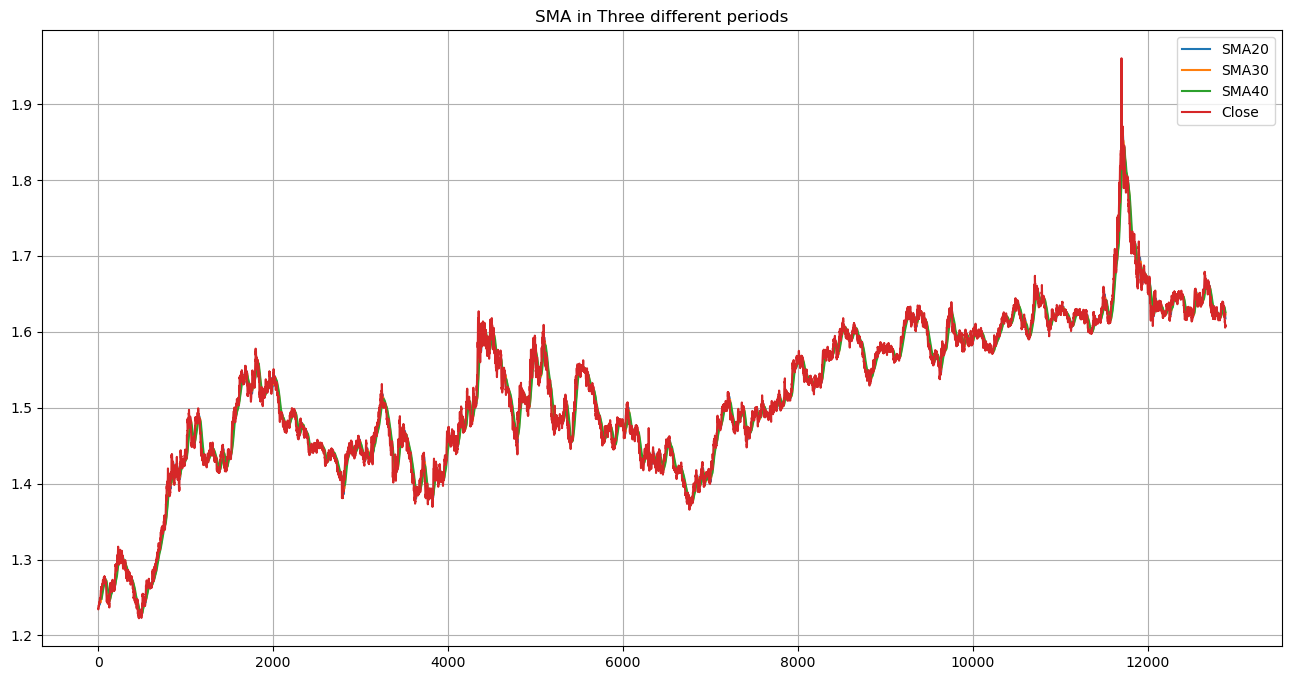

In [13]:
#SIMPLE MOVING AVARAGE

stock_data['SMA20'] = talib.SMA(stock_data['Close'], timeperiod=20)
stock_data['SMA30'] = talib.SMA(stock_data['Close'], timeperiod=30)
stock_data['SMA40'] = talib.SMA(stock_data['Close'], timeperiod=40)
plt.figure(figsize=(16, 8))
plt.plot(stock_data['SMA20'], label='SMA20')
plt.plot(stock_data['SMA30'], label='SMA30')
plt.plot(stock_data['SMA40'], label='SMA40')
plt.plot(stock_data['Close'], label='Close')
plt.legend()
plt.grid(True)
plt.title('SMA in Three different periods')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


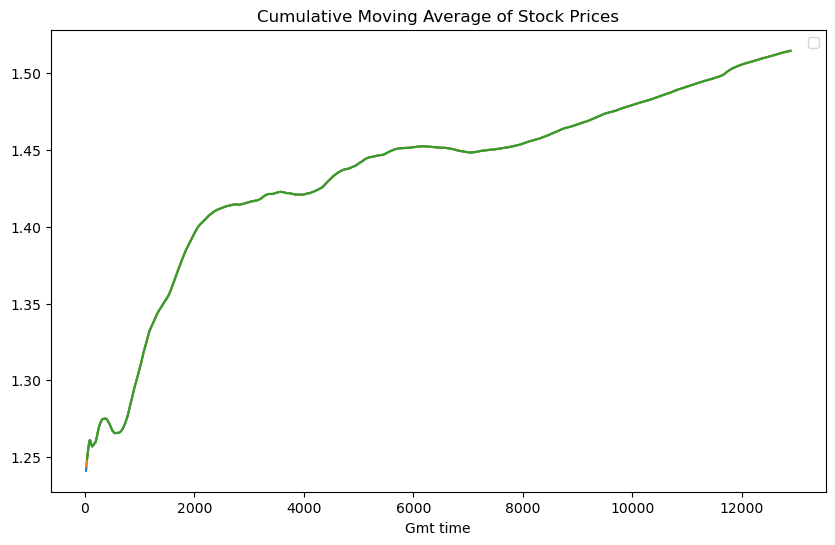

In [14]:
#CUMULATIVE MOVING AVARAGE
stock_data['CMA20'] = stock_data['Close'].expanding(min_periods=20).mean()
stock_data['CMA30'] = stock_data['Close'].expanding(min_periods=30).mean()
stock_data['CMA40'] = stock_data['Close'].expanding(min_periods=40).mean()

plt.figure(figsize=(10, 6))
plt.plot(stock_data['CMA20'])
plt.plot(stock_data['CMA30'])
plt.plot(stock_data['CMA40'])
plt.legend()
plt.xlabel('Gmt time')
plt.title('Cumulative Moving Average of Stock Prices')
plt.show()

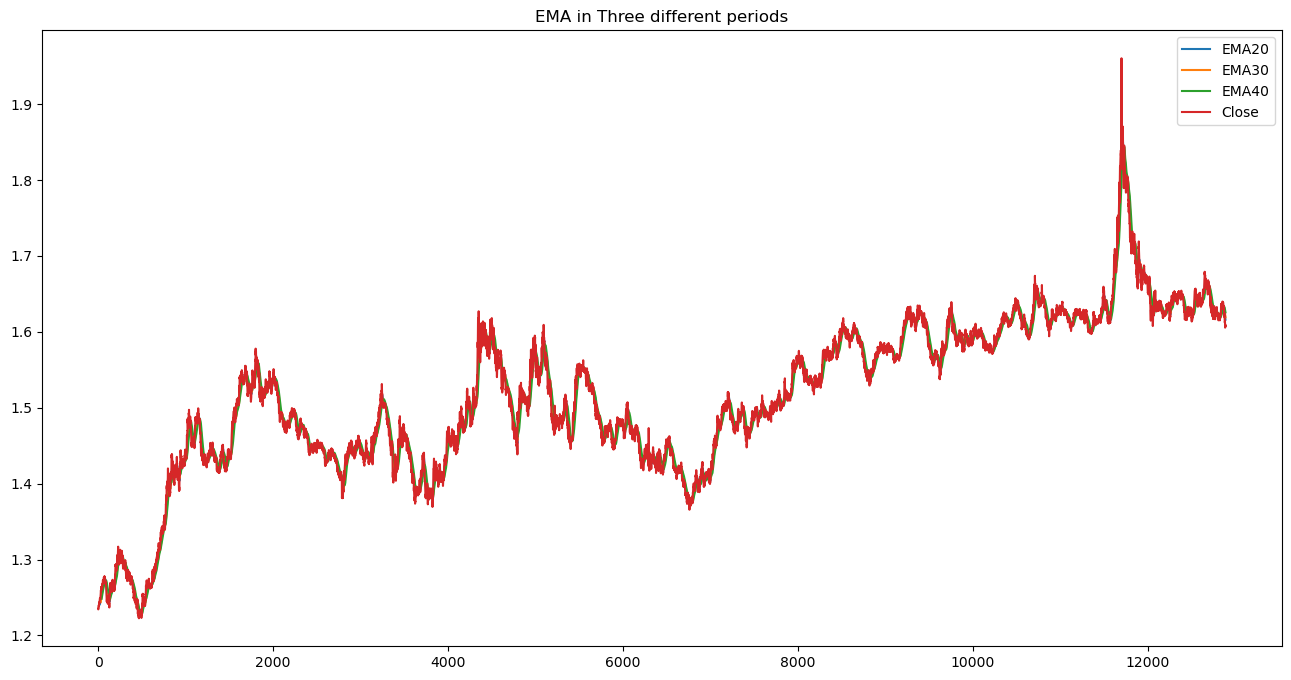

In [14]:
#EXPONENTIAL MOVING AVERAGE

stock_data['EMA20'] = talib.EMA(stock_data['Close'], timeperiod=20)
stock_data['EMA30'] = talib.EMA(stock_data['Close'], timeperiod=30)
stock_data['EMA40'] = talib.EMA(stock_data['Close'], timeperiod=40)
plt.figure(figsize=(16, 8))
plt.plot(stock_data['EMA20'], label='EMA20')
plt.plot(stock_data['EMA30'], label='EMA30')
plt.plot(stock_data['SMA40'], label='EMA40')
plt.plot(stock_data['Close'], label='Close')
plt.legend()
plt.title('EMA in Three different periods')
plt.show()

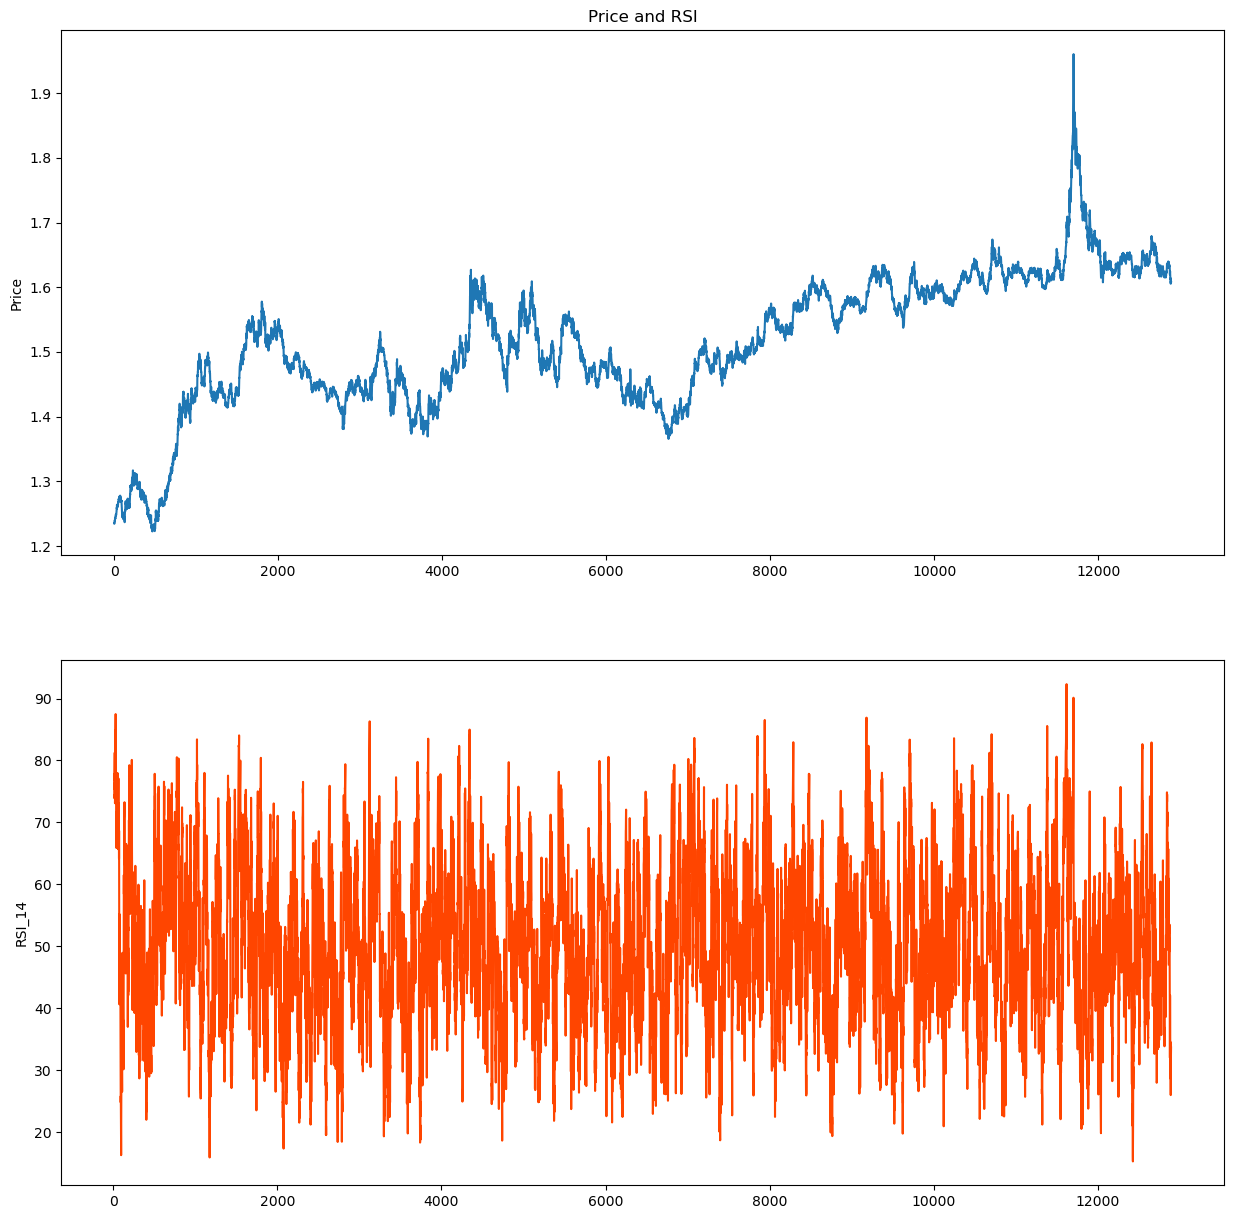

In [16]:
# RSI

stock_data['RSI_14'] = talib.RSI(stock_data['Close'],timeperiod = 14)

# Calculate RSI with a time period of 30,40
stock_data['RSI_30'] = talib.RSI(stock_data['Close'], timeperiod = 30)
stock_data['RSI_40'] = talib.RSI(stock_data['Close'], timeperiod = 40)

# Print the last five rows
#print(stock_data.tail())

fig, (ax1, ax2) = plt.subplots(2, figsize=(15,15))
# Plot RSI with the price
ax1.set_ylabel('Price')
ax1.plot(stock_data['Close'])
ax2.set_ylabel('RSI_14')
ax2.plot(stock_data['RSI_14'], color='orangered')

ax1.set_title('Price and RSI')
plt.show()

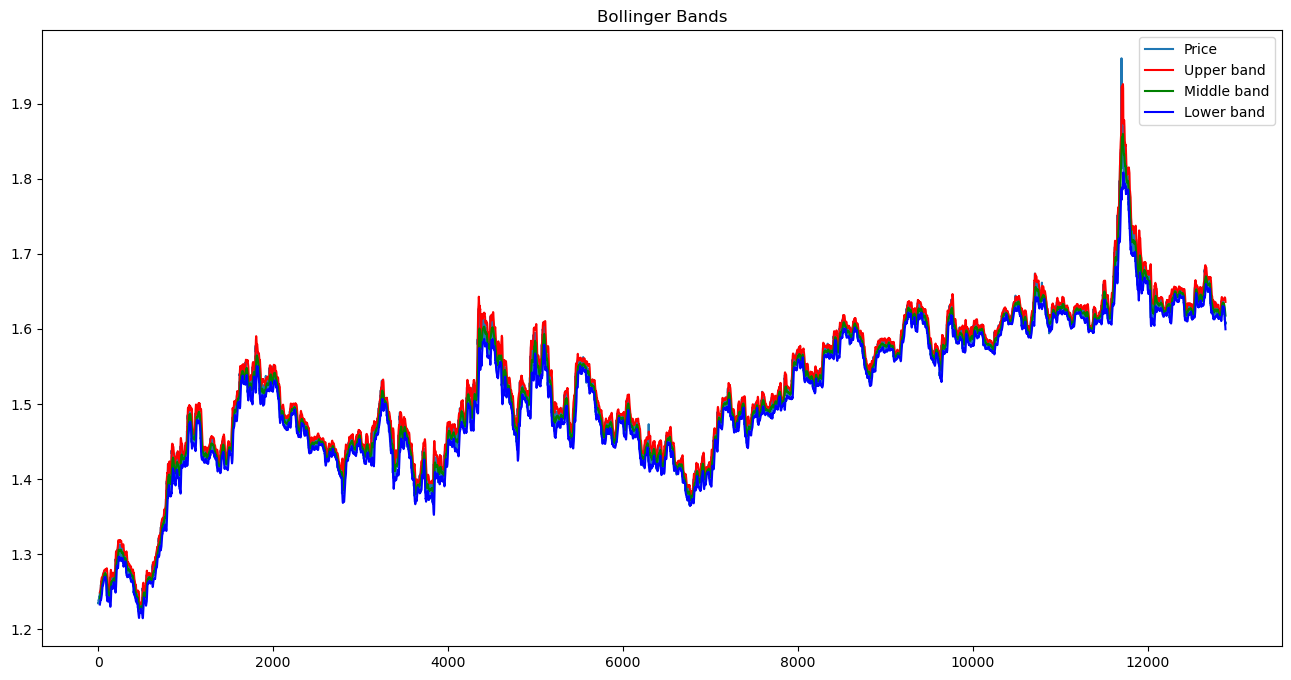

In [15]:
#Bollinger Bands 

upper, mid, lower = talib.BBANDS(stock_data['Close'],
                                 nbdevup=2,
                                 nbdevdn=2,
                                 timeperiod=20)

plt.figure(figsize=(16, 8))

# Plot the Bollinger Bands 
plt.plot(stock_data['Close'], label='Price')
plt.plot(upper, color='Red' , label='Upper band')
plt.plot(mid, color='Green', label='Middle band')
plt.plot(lower, color='blue', label='Lower band')

# Customize and show the plot
plt.title('Bollinger Bands')
plt.legend()
plt.show()

In [16]:
stock_data['price_change']= stock_data['Close'].diff()
stock_data['label']=0

for i in range(len(stock_data)-1):
    if stock_data.loc[i+1,'price_change']>0:
        stock_data.loc[i,'label']=1
stock_data.loc[len(stock_data)]=0
stock_data

,Gmt time,Volume,Open,High,Low,Close,SMA20,SMA30,SMA40,EMA20,EMA30,EMA40,price_change,label
0,2012-12-12 00:00:00,11011.3902,1.234920,1.235890,1.233830,1.235200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2012-12-12 04:00:00,13271.5599,1.235210,1.235510,1.233860,1.234340,NaN,NaN,NaN,NaN,NaN,NaN,-0.000860,1
2,2012-12-12 08:00:00,26716.2305,1.234350,1.236370,1.233305,1.234905,NaN,NaN,NaN,NaN,NaN,NaN,0.000565,1
3,2012-12-12 12:00:00,28430.1602,1.234910,1.237285,1.234850,1.236810,NaN,NaN,NaN,NaN,NaN,NaN,0.001905,1
4,2012-12-12 16:00:00,33124.1904,1.236800,1.238700,1.236285,1.238205,NaN,NaN,NaN,NaN,NaN,NaN,0.001395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12886,2020-11-12 08:00:00,48969.4700,1.605465,1.611820,1.605225,1.609935,1.621672,1.625305,1.627558,1.618911,1.621835,1.623393,0.004480,0
12887,2020-11-12 12:00:00,49848.5000,1.609930,1.611365,1.606575,1.606745,1.620331,1.624479,1.626822,1.617752,1.620862,1.622581,-0.003190,1
12888,2020-11-12 16:00:00,23094.5300,1.606720,1.609540,1.605880,1.607315,1.619021,1.623639,1.626230,1.616758,1.619988,1.621836,0.000570,1
12889,2020-11-12 20:00:00,5512.4200,1.607310,1.608910,1.606925,1.607785,1.617706,1.622859,1.625571,1.615904,1.619200,1.621151,0.000470,0


In [17]:
stock_data = stock_data.drop('Gmt time', axis=1)
stock_data = stock_data.drop('Close', axis=1)
stock_data = stock_data.drop('price_change', axis=1)
stock_data

,Volume,Open,High,Low,SMA20,SMA30,SMA40,EMA20,EMA30,EMA40,label
0,11011.3902,1.234920,1.235890,1.233830,NaN,NaN,NaN,NaN,NaN,NaN,0
1,13271.5599,1.235210,1.235510,1.233860,NaN,NaN,NaN,NaN,NaN,NaN,1
2,26716.2305,1.234350,1.236370,1.233305,NaN,NaN,NaN,NaN,NaN,NaN,1
3,28430.1602,1.234910,1.237285,1.234850,NaN,NaN,NaN,NaN,NaN,NaN,1
4,33124.1904,1.236800,1.238700,1.236285,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
12886,48969.4700,1.605465,1.611820,1.605225,1.621672,1.625305,1.627558,1.618911,1.621835,1.623393,0
12887,49848.5000,1.609930,1.611365,1.606575,1.620331,1.624479,1.626822,1.617752,1.620862,1.622581,1
12888,23094.5300,1.606720,1.609540,1.605880,1.619021,1.623639,1.626230,1.616758,1.619988,1.621836,1
12889,5512.4200,1.607310,1.608910,1.606925,1.617706,1.622859,1.625571,1.615904,1.619200,1.621151,0


In [18]:
stock_data

,Volume,Open,High,Low,SMA20,SMA30,SMA40,EMA20,EMA30,EMA40,label
0,11011.3902,1.234920,1.235890,1.233830,NaN,NaN,NaN,NaN,NaN,NaN,0
1,13271.5599,1.235210,1.235510,1.233860,NaN,NaN,NaN,NaN,NaN,NaN,1
2,26716.2305,1.234350,1.236370,1.233305,NaN,NaN,NaN,NaN,NaN,NaN,1
3,28430.1602,1.234910,1.237285,1.234850,NaN,NaN,NaN,NaN,NaN,NaN,1
4,33124.1904,1.236800,1.238700,1.236285,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
12886,48969.4700,1.605465,1.611820,1.605225,1.621672,1.625305,1.627558,1.618911,1.621835,1.623393,0
12887,49848.5000,1.609930,1.611365,1.606575,1.620331,1.624479,1.626822,1.617752,1.620862,1.622581,1
12888,23094.5300,1.606720,1.609540,1.605880,1.619021,1.623639,1.626230,1.616758,1.619988,1.621836,1
12889,5512.4200,1.607310,1.608910,1.606925,1.617706,1.622859,1.625571,1.615904,1.619200,1.621151,0


In [19]:
stock_data.fillna(0, inplace=True)

In [20]:
stock_data

,Volume,Open,High,Low,SMA20,SMA30,SMA40,EMA20,EMA30,EMA40,label
0,11011.3902,1.234920,1.235890,1.233830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,13271.5599,1.235210,1.235510,1.233860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,26716.2305,1.234350,1.236370,1.233305,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
3,28430.1602,1.234910,1.237285,1.234850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
4,33124.1904,1.236800,1.238700,1.236285,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
12886,48969.4700,1.605465,1.611820,1.605225,1.621672,1.625305,1.627558,1.618911,1.621835,1.623393,0
12887,49848.5000,1.609930,1.611365,1.606575,1.620331,1.624479,1.626822,1.617752,1.620862,1.622581,1
12888,23094.5300,1.606720,1.609540,1.605880,1.619021,1.623639,1.626230,1.616758,1.619988,1.621836,1
12889,5512.4200,1.607310,1.608910,1.606925,1.617706,1.622859,1.625571,1.615904,1.619200,1.621151,0


In [21]:
X=stock_data.iloc[:,:-1].values
y=stock_data.iloc[:,-1].values
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=52)


In [22]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

Confusion matrix for Random Forest
 [[682 630]
 [646 621]]
accuracy_random_Forest : 0.505
precision_random_Forest : 0.505
recall_random_Forest : 0.505
f1-score_random_Forest : 0.505


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)

Confusion matrix for KNN
 [[644 668]
 [616 651]]
accuracy_KNN : 0.502
precision_KNN : 0.502
recall_KNN: 0.502


In [24]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[1126  186]
 [1060  207]]
accuracy_Naive Bayes: 0.517
precision_Naive Bayes: 0.517
recall_Naive Bayes: 0.517
f1-score_Naive Bayes : 0.517
